# INDONESIAN MOVIES ON NETFLIX

## Table of Contents :
1. [INTRODUCTION](#1)
2. [NETFLIX DATA IN GENERAL](#2) 
3. [WHAT IS THE NUMBER OF COMPARISONS FOR INDONESIAN TV SHOWS AND MOVIES ?](#3)
4. [HOW MANY INDONESIAN MOVIES WAS RELEASED EACH YEAR ON NETFLIX ?](#4)
5. [HOW MANY INDONESIAN MOVIES RATING & GENRE ARE THERE ON NETFLIX ?](#5)
6. [WHO ARE THE MOVIE DIRECTORS & ACTORS FROM INDONESIA ?](#6)
7. [CONCLUSION](#7)

## **1. INTRODUCTION** <a name="1"></a>

**Netflix** is a streaming service that allows our members to watch a wide variety of award-winning TV shows, movies, documentaries, and more on thousands of internet-connected devices In over 190 countries.

Indonesian movies on netflix are increasingly taking an international watch. More and more of these high-quality Indonesian movies have sprung up. This shows how Indonesian movies industry has grown. Not just playing in theaters, an Indonesian movies can be enjoyed through the netflix streaming service. You can go to movies that have been shown long and new at any time or place. long and new at any time or place. 

But on this occasion I'm not going to discuss how good Indonesian movies  are. I'm trying to show you facts or insights about Indonesian movies on Netflix.

## Context

- What : Netflix is a streaming service that allows our members to watch a wide variety of award-winning TV shows, movies, documentaries, and more on thousands of internet-connected devices In over 190 countries.
- Who : Who wants to know about Indonesian movies on netflix
- Where : Indonesian Movies on Netflix.com from datasets : netflix_titles.csv at https://www.kaggle.com/code/manjunathgb/practical-4/data
- When : 2008 - 2021, excluding data in 2022.
- Why : I want to show you facts or insights about Indonesian movies on Netflix.
- How : I use numpy, pandas, matplotlib, and seaborn libraries. I put my code in note book called 'Blog Post.ipnyb' and the result can give us some insight about Indonesian Movies on Netflix. And also, I will focus on the Indonesian movies data alone, because For a TV show in Indonesia, there are only two data.


### *Importing all the necessary libraries*

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob

### *Importing the dataset*

In [2]:
df = pd.read_csv('./netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

Our data set has 12 features and 8807 examples

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### *Data Cleaning*

In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The missing values are in:

- director: Very less information-not needed for the analysis so I will be leting this
- cast: this var has too many diferent values too so I will be leting this
- country: this is a importante variable so wi will think how to fix it (maybe mode)
- date_added: there are just a few cases, so lets scrap them
- rating: there are just a few cases, so lets scrap them
- duration : there are just a few cases, so lets scrap them

### *Let's fix the missing "rating"*

In [6]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [7]:
df[df["rating"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


Since there are only 4 rows so I decided to find there replacements from internet.

In [8]:
rating_replacements = {
    5989: 'TV-PG',
    6827: 'TV-14',
    7312: 'TV-MA',
    7537: 'TV-MA',
}

for id, rate in rating_replacements.items():
    df.iloc[id, 8] = rate
    
df['rating'].isna().sum()

0

### *Fix "date_added" column*

In [9]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


Since it is difficult to find the date_added so I will drop these as they are only 10 rows.

In [10]:
df=df[df["date_added"].notna()]

In [11]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### *Fix "country" missing values*

In [12]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

There are some entry where "country" has multiple values. so i think i will add a new column with just the first one so we can check witch regions have more productions

In [13]:
# Lets retrieve just the first country
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: principal_country, dtype: object

### *Fix "duration" missing values*

In [14]:
df[df["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,principal_country
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",United States
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,United States
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,United States


In [15]:
duration_replacements = {
    5541: '74 Min',
    5794: '82 Min',
    5813: '66 Min',
}

for id, time in duration_replacements.items():
    df.iloc[id, 9] = time
    
df['rating'].isna().sum()

0

In [16]:
df.isna().sum()

show_id                 0
type                    0
title                   0
director             2624
cast                  825
country                 0
date_added              0
release_year            0
rating                  0
duration                0
listed_in               0
description             0
principal_country       0
dtype: int64

Look up, I let field data to director and cast.

### *Makesure no data duplicated*

In [17]:
df[df['title'].duplicated(keep="last")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,principal_country


In [18]:
df[df['title'].duplicated(keep="first")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,principal_country


In [19]:
print(df.duplicated().sum()) #checking if there is any duplicate items

0


Look up, the result is not data duplicated..

## **2. NETFLIX DATA IN GENERAL** <a name="2"></a>

Before discussing about the Indonesian movies on netflix, I want to show you first about the data on netflix in general.

In [20]:
type = df['type'].value_counts()

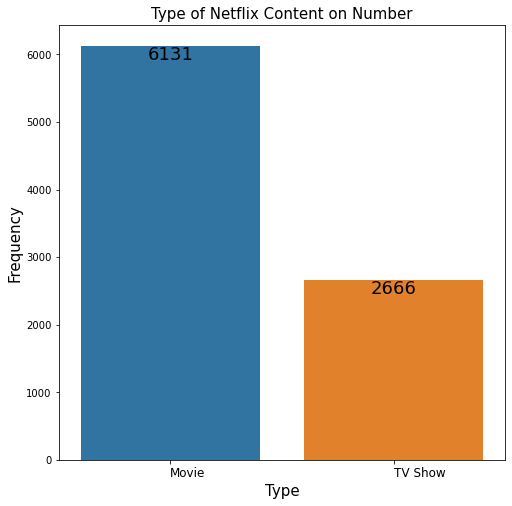

In [21]:
plt.figure(figsize = (8,8))
#plot for first chart
sns.barplot(x = type.index.values, y = type)
#adding text on the bar
for i in range (type.shape[0]): 
    count = type[i]
    plt.text(i, count-1.5, count, ha = 'center', va='top', color = 'black', fontsize = 18)

#customizing chart
plt.title('Type of Netflix Content on Number', fontsize = 15)
plt.xlabel('Type', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation=-0, ha ='left', fontsize = 12);

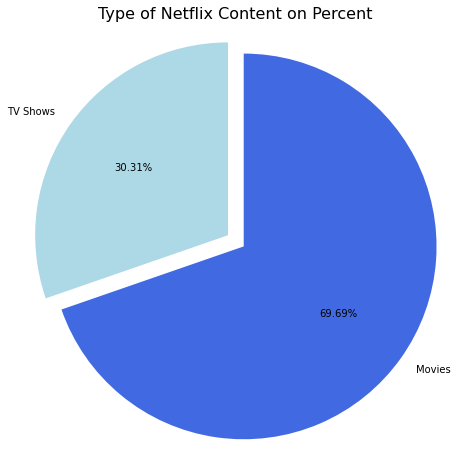

In [31]:
labels = ['TV Shows', 'Movies']
colors = sns.color_palette('Set1')
plt.figure(figsize=(8,8))
plt.pie(df['type'].value_counts().sort_values(), labels = labels, colors = ['lightblue','royalblue'], autopct='%10.2f%%', explode=[0.05,0.05], startangle=90)
plt.title("Type of Netflix Content on Percent", size=16)
plt.axis('equal')
plt.show()


we see, until the year 2021 there are 1631 movie titles (69.9%) and 2666 tv show titles (30.31%) on netflix., 

In [ ]:
df['country'].value_counts()[:100]

Top 15 Country which has most number of title and Indonesia is in the last position with 79 Titles.

In [ ]:
top15 = df['country'].value_counts()[:15]
plt.figure(figsize = (15,8))
#plot for first chart
sns.barplot(x = top15.index.values, y = top15)
#adding text on the bar
for i in range (top15.shape[0]): 
    count = top15[i]
    plt.text(i, count-1.5, count, ha = 'center', va='bottom', color = 'black', fontsize = 14)

#customizing chart
plt.title('Top 15 Country which has most number of title', fontsize = 15)
plt.xlabel('Countries ', fontsize =15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation=-30, ha ='left', fontsize = 12);

We can see that United States contribute the most number of titles movie and TV Show, followed by India, United Kingdom and Indonesia is in 15th position with 79 titles.


### *Indonesian Data Exploration*

In [ ]:
df_indonesia=df[df['country']=='Indonesia']
df_indonesia.head(10)

**Column explanations in Netflix dataset:**
* show_id: unique ID for each movie
* type: 'Movie' or 'TV Show' 
* title: official movie title
* director: name of director
* cast: list of actors' names in movie
* country: country where the movie was produced
* date_added: date that the movie was added to Netflix
* release_year: year that the movie was originally released
* rating: age rating of movie
* duration: duration of the movie in minutes
* listed_in: relevant genres of the movie
* description: short description of the movie plot

The only columns that I will be using here are title, release_year, listed_in and country as title and release_year are important identifiers, listed_in allows us to find the best movies from different genres and country allows us to find the best movies for each country.

In [ ]:
df_indonesia.shape

In [ ]:
df_indonesia.nunique()

In [ ]:
df_indonesia.info()

In [ ]:
df_indonesia.isnull().sum()

There're missing values for Indonesian data in director and cast, but this is relatively small and we can complete it


## **3. WHAT IS THE NUMBER OF COMPARISONS FOR INDONESIAN TV SHOWS AND MOVIES  ?** <a name="3"></a>

In [ ]:
df_indonesia['type'].value_counts()[:15]

In [ ]:
df_TVshow=df_indonesia[(df_indonesia['type']=='TV Show')][['show_id', 'type', 'title', 'director', 'cast','date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']] #  filter Movies data from dataset

In [ ]:
df_TVshow.head()

In [ ]:
df_movie=df_indonesia[(df_indonesia['type']=='Movie')][['show_id', 'type', 'title', 'director', 'cast','date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']] #  filter Movies data from dataset

In [ ]:
df_movie.head ()

In [ ]:
temp_df = df_indonesia
plt.figure(figsize = (12,8))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'type', data = temp_df, palette = "colorblind")
plt.title('Indonesian Movies Release Each Years' ,size=16)
plt.xlabel('Type', size=14)
plt.ylabel('Number of Titles', size=14)
plt.xticks(rotation = 0)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.35, p.get_height()+0.25), va = 'bottom', color = 'black',fontsize =14)

In [ ]:
labels = ['TV Shows', 'Movies']
colors = sns.color_palette('Set2')
plt.figure(figsize=(8,10))
plt.pie(df_indonesia['type'].value_counts().sort_values(), labels = labels, colors = ['lightblue','royalblue'], autopct='%25.2f%%', explode=[0.1,0.1], startangle=90)
plt.title("Type of Netflix Content Comparison")
plt.axis('equal')
plt.show()
print("\n Indonesian dataset consists of 77 (97.47%)for Movies and 2 (2.53%) for TV Shows")

According to the above information, there are only two Indonesian TV shows playing on the netflix channel. The "check the store next door" was released in 2020 and "Hati Perempuan" was released in 2017, as for the Indonesian Movies there are many titles.

So, I'll just take care of the Indonesian movies on netflix.

## **4. HOW MANY INDONESIAN MOVIES WAS RELEASED EACH YEAR ON NETFLIX ?** <a name="4"></a>

In [ ]:
temp_df = df_indonesia[df_indonesia['type']=='Movie']

plt.figure(figsize = (12,8))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'release_year', data = temp_df, palette = "colorblind")
plt.title('Indonesian Movies Release Each Years' ,size=16)
plt.xlabel('Year of Release', size=14)
plt.ylabel('Number of Movies', size=14)
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+0.25), va = 'bottom', color = 'black')

The above graph shows most Indonesian movies released in 2018 and 2020

## **5. HOW MANY INDONESIAN MOVIES RATING & GENRE ARE THERE ON NETFLIX ?**<a name="5"></a>

### *Indonesian Movies Rating*

In [ ]:
temp_df = df_indonesia[df_indonesia['type']=='Movie'] ##filter movie
temp_df['rating'].value_counts()[:15] 

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="rating", data=temp_df, palette = "pastel", order=df_indonesia['rating'].value_counts().index[0:15])
plt.xlabel('RATING', fontsize = 14)
plt.ylabel('NUMBER of TITLES', fontsize = 14)
plt.title('Rating of Indonesian Movies in Netflix', size = 16)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.35, p.get_height()+1), fontsize = 14, va = 'top', color = 'black')

In [ ]:
z = temp_df.groupby(['rating']).size().reset_index(name = 'counts')
#Visualize the results
piechart = px.pie(z, values = 'counts', names = 'rating', 
                  title = 'Distribution of the content ratings on Netflix',
                 color_discrete_sequence = px.colors.qualitative.Set3)
piechart.show()

### Rate reference  
Let’s look at the definitions of the different ratings according to [http://www.tvguidelines.org/](“http://www.tvguidelines.org/resources/TV_Parental_guidelines_Brochure.pdf”)


<center> Table: Meaning of the different ratings </center>

|     Rating      |     Meaning                                                                                                                                        |
|-----------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
|     NC-17       |     No One 17 and Under Admitted. Clearly adult. Young children will not be admitted to   watch the film.                                          |
|     TV-Y7-FV    |     Is used to indicate that a program contains “fantasy   violence” that may be more intense or combative than other TV-Y7 programs.    |
|     UR          |     Unrated                                                                                                                                        |
|     G           |     Most parents would find this program suitable for all ages.                                                                                  |
|     NR          |     Not Rated                                                                                                                                      |
|     TV-Y7       |     This program is designed for children age 7 and above.                                                                                         |
|     TV-G        |     This program is designed for children age 7 and above.                                                                                         |
|     TV-Y        |     This program is designed to be appropriate for all   children                                                                                  |
|     PG          |     This program contains material that parents may find   unsuitable for younger children.                                                        |
|     PG-13       |     Some material may be inappropriate for   children under 13                                                                                     |
|     TV-PG       |     This program contains material that parents may find   unsuitable for younger children.                                                        |
|     R           |     Children Under 17 Require Accompanying Parent or Adult Guardian                                                                                |
|     TV-14       |     This   program contains some material that many parents would find unsuitable for   children under 14 years of     age.                        |
|     TV-MA       |     This   program is specifically designed to be viewed by adults and therefore may be unsuitable   for children     under 17                     |


<n> </n>  
The above graph shows the number of Indonesian movies in the data frame for each rating. There are three top rankings, namely program contains some material that many parents would find unsuitable for children under 14 years of age (TV-14) has 33 of titles (42.9%), program contains material that parents may find unsuitable for younger children (TV-PG) has 20 of titles (26%), and program is specifically designed to be viewed by adults and therefore may be unsuitable for children     under 17 years of age (TV-MA) has 14 of titles (18.2%). 



### *Indonesian Movies Genre*

In [ ]:
listed_in_count = temp_df.copy()
listed_in_count = pd.concat([listed_in_count, temp_df["listed_in"].str.split(",", expand = True)], axis = 1)
listed_in_count

In [ ]:
listed_in_count = listed_in_count.melt(id_vars = ["type", "title"], value_vars = range(3), value_name = "listed_in")
listed_in_count = listed_in_count[listed_in_count["listed_in"].notna()]
listed_in_count

In [ ]:
listed_in_count["listed_in"].unique()

In [ ]:
temp_df["listed_in"].value_counts()

In [ ]:
plt.figure(figsize = (20, 8))
listed_in = listed_in_count["listed_in"].value_counts()[:15]
sns.barplot(x = listed_in, y = listed_in.index, palette = "Dark2")

plt.title('Movies Genre From Indonesia in Netflix',size=16)
plt.xlabel('NUMBER Of TITLES', size=14)
plt.ylabel('GENRE', size=14)
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+0.25), va = 'bottom', color = 'black')

There are 14 genres of Indonesian movies on Netflix, but the most dominant are international movies, dramas and romantic movies.

## **6.WHO ARE THE MOVIE DIRECTORS & ACTORS FROM INDONESIA ?** <a name="6"></a>

### *Movies Directors*

In [ ]:
temp_df = df_indonesia[df_indonesia['type']=='Movie'] ##filter movie
temp_df['director'].value_counts() 

In [ ]:
temp_df = df_indonesia[df_indonesia['type']=='Movie']

plt.figure(figsize = (15, 8))
ax = sns.countplot(y="director", data=temp_df, palette = "colorblind",order=temp_df['director'].value_counts().index[0:10])
plt.title('Top 10 Movie Directors From Indonesia',size=16)
plt.xlabel('TITLES',size=12)
plt.ylabel('DIRECTORS', size=12)
plt.show()

### *Actors*

In [ ]:
cast_count = temp_df.copy()
cast_count = pd.concat([cast_count, temp_df["cast"].str.split(",", expand = True)], axis = 1)
cast_count

In [ ]:
cast_count = cast_count.melt(id_vars = ["type", "title"], value_vars = range(10), value_name = "cast")
cast_count = cast_count[cast_count["cast"].notna()]
cast_count

In [ ]:
cast_count["cast"].nunique()

In [ ]:
plt.figure(figsize = (12, 8))
cast = cast_count["cast"].value_counts()[:10]
sns.barplot(x = cast, y = cast.index, palette = "gist_ncar")
plt.title('Top 10 Actor From Indonesia',size=16)
plt.xlabel('CASTING', size=14)
plt.ylabel('NAME', size=14)
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+0.25), va = 'bottom', color = 'black')

## **7. CONCLUSION** <a name="7"></a>

## *Reference*